In [1]:
from netCDF4 import Dataset
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../../analysis_scripts/"))
import ncmc_analysis_tools as tools

In [3]:
t3p_folders = glob('../tip3p/npert_*')
t3p = tools.AutoAnalyzeNCMCOptimization(t3p_folders)
t4p_folders = glob('../tip4pew/npert_*')
t4p = tools.AutoAnalyzeNCMCOptimization(t4p_folders)

## Acceptance probability 

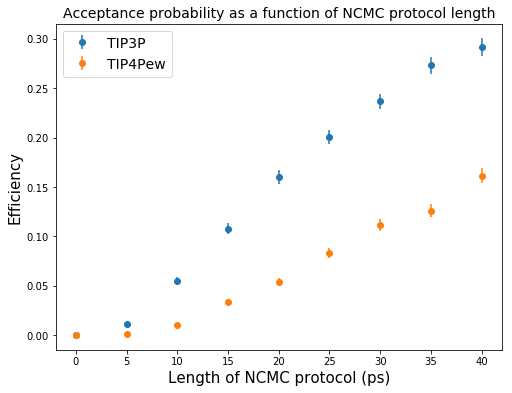

In [4]:
plt.figure(figsize=[8,6])
plt.errorbar(t3p.protocol_length, t3p.accept, yerr=t3p.accept_error*2, fmt='o', label='TIP3P')
plt.errorbar(t4p.protocol_length, t4p.accept, yerr=t4p.accept_error*2, fmt='o', label='TIP4Pew')
#plt.ylim((0 - graph_nudge, np.max(t3p_efficieny) + graph_nudge))
plt.xlabel('Length of NCMC protocol (ps)', fontsize=15)
plt.ylabel('Efficiency', fontsize=15)
plt.title('Acceptance probability as a function of NCMC protocol length', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Efficiency as a function of protocol length

### Method 1.
Estimating the efficiency, denoted $Eff$, with

$$ Eff \propto \frac{P(\text{accept})} {\text{time}} $$

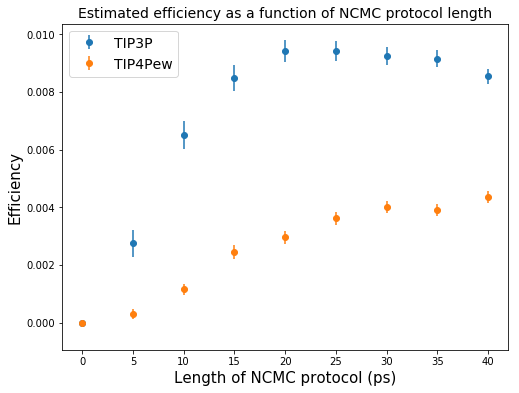

In [5]:
t3p_efficieny, t3p_efficiency_error = t3p.calc_efficiency(mode='acceptance')
t4p_efficieny, t4p_efficiency_error = t4p.calc_efficiency(mode='acceptance')

graph_nudge = 0.1*np.max(t3p_efficieny)

plt.figure(figsize=[8,6])
plt.errorbar(t3p.protocol_length, t3p_efficieny, yerr=t3p_efficiency_error*2, fmt='o', label='TIP3P')
plt.errorbar(t4p.protocol_length, t4p_efficieny, yerr=t4p_efficiency_error*2, fmt='o', label='TIP4Pew')
plt.ylim((0 - graph_nudge, np.max(t3p_efficieny) + graph_nudge))
plt.xlabel('Length of NCMC protocol (ps)', fontsize=15)
plt.ylabel('Efficiency', fontsize=15)
plt.title('Estimated efficiency as a function of NCMC protocol length', fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Method 2.
Estimating the efficiency using the statistical inefficiency, $g$, such that

$$ Eff \propto \frac{1} {\text{time} \times g} $$

In [6]:
t3p_efficieny = t3p.calc_efficiency(mode='statistical inefficiency')
t4p_efficieny = t4p.calc_efficiency(mode='statistical inefficiency')

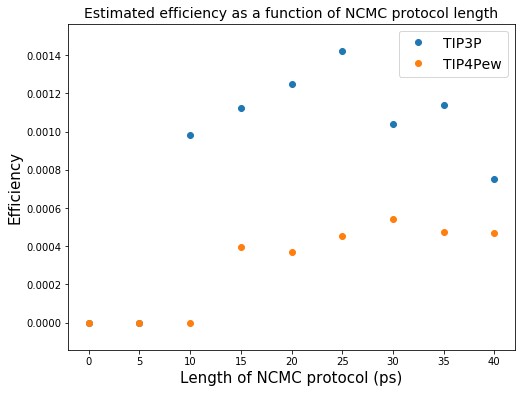

In [7]:
graph_nudge = 0.1*np.max(t3p_efficieny)

plt.figure(figsize=[8,6])
plt.plot(t3p.protocol_length, t3p_efficieny, marker='o', label='TIP3P', lw=0)
plt.errorbar(t4p.protocol_length, t4p_efficieny, marker='o', label='TIP4Pew', lw=0)
plt.ylim((0 - graph_nudge, np.max(t3p_efficieny) + graph_nudge))
plt.xlabel('Length of NCMC protocol (ps)', fontsize=15)
plt.ylabel('Efficiency', fontsize=15)
plt.title('Estimated efficiency as a function of NCMC protocol length',fontsize=14)
plt.legend(fontsize=14)
plt.show()